In [1]:
from tslearn.clustering import TimeSeriesKMeans
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


c:\Users\Leo\.conda\envs\bigdata\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


# Carico le serie temporali e resa

In [2]:
with open('./pickles/allPixelNDREPoly3.pickle', 'rb') as handle:
    allPixelNDREPoly3 = pickle.load(handle)

with open('./pickles/allPixelNDREPoly4.pickle', 'rb') as handle:
    allPixelNDREPoly4 = pickle.load(handle)

with open('./pickles/allPixelNDREPoly6.pickle', 'rb') as handle:
    allPixelNDREPoly6 = pickle.load(handle)

with open('./pickles/newResa3.pickle', 'rb') as handle:
    newResa3 = pickle.load(handle)

with open('./pickles/newResa4.pickle', 'rb') as handle:
    newResa4 = pickle.load(handle)

with open('./pickles/newResa6.pickle', 'rb') as handle:
    newResa6 = pickle.load(handle)



# filtraggio

In [3]:
allPixelNDREPoly3 = allPixelNDREPoly3[(newResa3<=11000) & (newResa3 >= 4000),:]
newResa3 = newResa3[(newResa3<=11000) & (newResa3 >= 4000)]

allPixelNDREPoly4 = allPixelNDREPoly4[(newResa4<=11000) & (newResa4 >= 4000),:]
newResa4 = newResa4[(newResa4<=11000) & (newResa4 >= 4000)]
print(len(newResa4))

allPixelNDREPoly6 = allPixelNDREPoly6[(newResa6<=11000) & (newResa6 >= 4000),:]
newResa6 = newResa6[(newResa6<=11000) & (newResa6 >= 4000)]
print(len(newResa6))

1065
1700


# k-means su tutta la serie temporale 

In [4]:
# k-means su tutto l'asse temporale 
num_cluster = 4



window3 = (6,0)
num_cluster3 = 4
with open('./pickles/kmeans_total_3_c_ndre'+str(num_cluster3)+'.pickle', 'rb') as handle:
    clusterResult3 = pickle.load(handle)
clusterResult3 = clusterResult3[window3]

with open('./pickles/kluster_centroids_3_c_ndre'+str(num_cluster3)+'.pickle', 'rb') as handle:
    clustercentroids3 = pickle.load(handle)
clustercentroids3 = clustercentroids3[window3]


window4 = (2,0)
num_cluster4 = 2
with open('./pickles/kmeans_total_4_c_ndre'+str(num_cluster4)+'.pickle', 'rb') as handle:
    clusterResult4 = pickle.load(handle)
clusterResult4 = clusterResult4[window4]

with open('./pickles/kluster_centroids_4_c_ndre'+str(num_cluster4)+'.pickle', 'rb') as handle:
    clustercentroids4 = pickle.load(handle)
clustercentroids4 = clustercentroids4[window4]



window6 = (6,0)
num_cluster6 = 2
with open('./pickles/kmeans_total_6_c_ndre'+str(num_cluster6)+'.pickle', 'rb') as handle:
    clusterResult6 = pickle.load(handle)
clusterResult6 = clusterResult6[window4]

with open('./pickles/kluster_centroids_6_c_ndre'+str(num_cluster6)+'.pickle', 'rb') as handle:
    clustercentroids6 = pickle.load(handle)
clustercentroids6 = clustercentroids6[window6]


# plot dei cluster

C:\Users\Leo\AppData\Local\Temp\ipykernel_25976\508542958.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(xx.ravel(), "k-", alpha=transparent,color=colors[a])


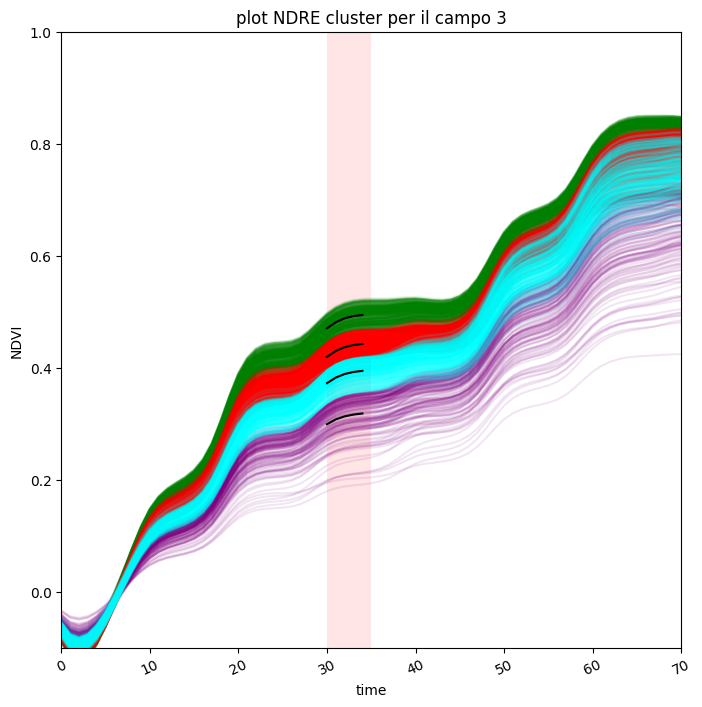

In [5]:
transparent = 0.1

colors = ['green','red','purple','cyan','blue']

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
plt.sca(axs)
plt.xticks(rotation=25) # Rotate label

axs.set_title("plot NDRE cluster per il campo 3")
axs.set_xlabel("time")
axs.set_ylabel("NDVI")
axs.set_ylim(-0.1,1)
axs.set_xlim(0,70)
for a in range(0,num_cluster3):
    for xx in allPixelNDREPoly3[clusterResult3 == a]:
        axs.plot(xx.ravel(), "k-", alpha=transparent,color=colors[a])
    
    axs.plot(range(window3[0]*5,(window3[0]+window3[1]+1)*5),clustercentroids3[a],color="black")

left, bottom, width, height = (window3[0]*5, -1, (window3[1]+1)*5, 3)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="red")
axs.add_patch(rect)
plt.sca(axs)
plt.xticks(rotation=25)
plt.show()

C:\Users\Leo\AppData\Local\Temp\ipykernel_25976\2736826984.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(xx.ravel(), "k-", alpha=transparent,color=colors[a])


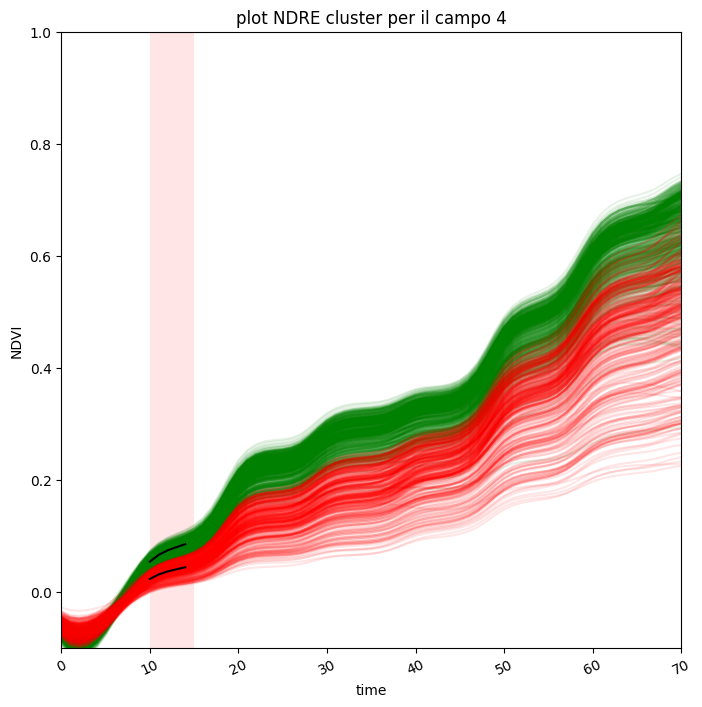

In [6]:
transparent = 0.1

colors = ['green','red','purple','cyan','blue','orange']

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

plt.sca(axs)
plt.xticks(rotation=25) # Rotate label

axs.set_title("plot NDRE cluster per il campo 4")
axs.set_xlabel("time")
axs.set_ylabel("NDVI")
axs.set_ylim(-0.1,1)
axs.set_xlim(0,70)
for a in range(0,num_cluster4):
    for xx in allPixelNDREPoly4[clusterResult4 == a]:
        axs.plot(xx.ravel(), "k-", alpha=transparent,color=colors[a])
    
    axs.plot(range(window4[0]*5,(window4[0]+window4[1]+1)*5),clustercentroids4[a],color="black")

left, bottom, width, height = (window4[0]*5, -1, (window4[1]+1)*5, 3)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="red")
axs.add_patch(rect)
plt.sca(axs)
plt.xticks(rotation=25)
plt.show()

C:\Users\Leo\AppData\Local\Temp\ipykernel_25976\1889053704.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(xx.ravel(), "k-", alpha=transparent,color=colors[a])


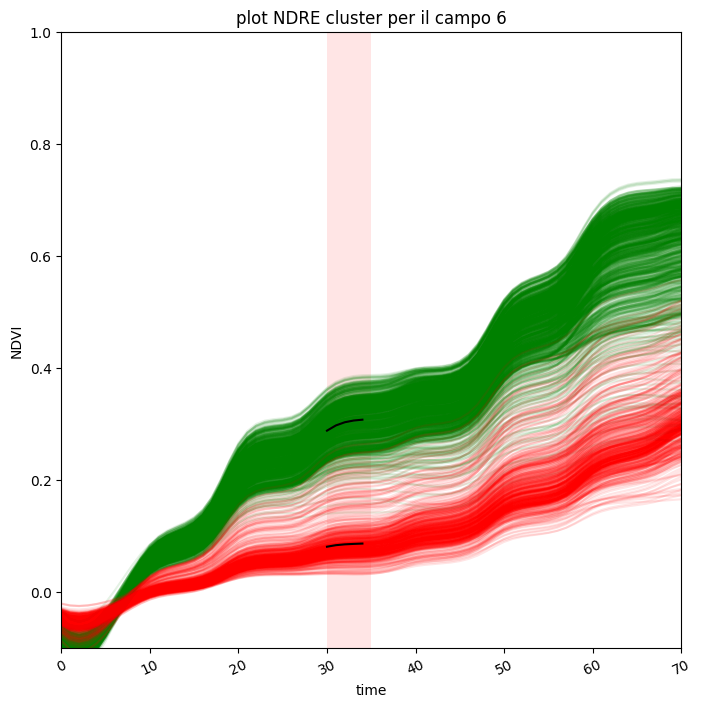

In [7]:
transparent = 0.1

colors = ['green','red','purple','cyan','blue','orange']

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
plt.sca(axs)
plt.xticks(rotation=25) # Rotate label

axs.set_title("plot NDRE cluster per il campo 6")
axs.set_xlabel("time")
axs.set_ylabel("NDVI")
axs.set_ylim(-0.1,1)
axs.set_xlim(0,70)
for a in range(0,num_cluster6):
    for xx in allPixelNDREPoly6[clusterResult6 == a]:
        axs.plot(xx.ravel(), "k-", alpha=transparent,color=colors[a])
    
    axs.plot(range(window6[0]*5,(window6[0]+window6[1]+1)*5),clustercentroids6[a],color="black")

left, bottom, width, height = (window6[0]*5, -1, (window6[1]+1)*5, 3)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="red")
axs.add_patch(rect)
plt.sca(axs)
plt.xticks(rotation=25)
plt.show()